In [2]:
import scipy.fftpack as fftim
from PIL import Image
# Opening the image and converting it to grayscale.
b = Image.open('C:/Users/Kanni/Desktop/KCE-ECE-CVP-2023/Demo/Figures_FT/fft1.png').convert('L') 
# Performing FFT.
c = abs(fftim.fft2(b))
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)
# Converting the d to floating type and saving it 
# as fft1_output.raw in Figures folder.
d.astype('float').tofile('C:/Users/Kanni/Desktop/KCE-ECE-CVP-2023/Demo/Figures_FT/fft1_output.raw')


In [5]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/fb/c4/f574ba6f04e6d7bf8c38d23e7a52389566dd7631fee0bcdd79ea07ef2dbf/opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB 660.6 kB/s eta 0:00:58
   ---------------------------------------- 0.1/38.1 MB 1.8 MB/s eta 0:00:21
   ---------------------------------------- 0.3/38.1 MB 2.5 MB/s eta 0:00:15
    --------------------------------------- 0.5/38.1 MB 3.0 MB/s eta 0:00:13
    --------------------------------------- 0.8/38.1 MB 4.0 MB/s eta 0:00:10
   - -------------------------------------- 1.0/38.1 MB 4.2 MB/s eta 0:00:09
   - -------------------------------------- 1.2/38.1 MB 4.6 MB/s eta 0:00:08
   - -------------------------------------- 1.6/38.1 MB 5.1 MB/s eta 0:00:08
   - -------------------------------------- 1.9/38.1 MB 5.4 MB/s eta 0:00:07
   -- --------

In [6]:
import numpy, math
import scipy.fftpack as fftim
from PIL import Image
import cv2

# Opening the image and converting it to grayscale.
b = Image.open('C:/Users/Kanni/Desktop/KCE-ECE-CVP-2023/Demo/Figures_FT/fft1.png').convert('L')
 # Performing FFT.
c = fftim.fft2(b)
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and
# values in H are initialized to 1.
H = numpy.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # cut-off radius
t1 = 1 # the order of BLPF
t2 = 2*t1

# Defining the convolution function for BLPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = math.sqrt(r1)
        # Using cut-off radius to
        # eliminate high frequency.
        if r > d_0:
            H[i,j] = 1/(1 + (r/d_0)**t1)

# Converting H to an image
H = Image.fromarray(H)
# Performing the convolution.
con = d * H
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con))
# Saving e.
cv2.imwrite('C:/Users/Kanni/Desktop/KCE-ECE-CVP-2023/Demo/Figures_FT/blowpass_output.png', e)


True

In [9]:
import cv2
import numpy, math
import scipy.fftpack as fftim   
from PIL import Image

# Opening the image and converting it to grayscale.
b = Image.open('C:/Users/Kanni/Desktop/KCE-ECE-CVP-2023/Demo/Figures_FT/fft1.png').convert('L') 
# Performing FFT.
c = fftim.fft2(b)  
# Shifting the Fourier frequency image.
d = fftim.fftshift(c) 

# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]  
# H is defined and 
# values in H are initialized to 1.
H = numpy.ones((M,N)) 
center1 = M/2
center2 = N/2
d_0 = 30.0 # cut-off radius

# Defining the convolution function for ILPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from 
        # origin is computed.
        r = math.sqrt(r1) 
        # Using cut-off radius to eliminate 
        # high frequency.
        if r > d_0:
            H[i,j] = 0.0
# Converting H to an image.
H =  Image.fromarray(H) 
# Performing the convolution.
con = d * H 
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con)) 
# Saving e as ilowpass_output.png in
# Figures folder .
cv2.imwrite('C:/Users/Kanni/Desktop/KCE-ECE-CVP-2023/Demo/Figures_FT/ilowpass_output.png', e)


True

In [11]:
import cv2
import numpy, math
import scipy.misc
import scipy.fftpack as fftim
from PIL import Image

# Opening the image.
a = cv2.imread('C:/Users/Kanni/Desktop/KCE-ECE-CVP-2023/Demo/Figures_FT/endothelium.png')
# Converting the image to grayscale.
b = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
# Performing FFT.
c = fftim.fft2(b) 
# Shifting the Fourier frequency image.    
d = fftim.fftshift(c) 
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and 
# values in H are initialized to 1.
H = numpy.ones((M,N)) 
center1 = M/2
center2 = N/2
d_0 = 30.0 # cut-off radius
t1 = 1 # the order of BHPF
t2 = 2*t1    

# Defining the convolution function for BHPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from 
        # origin is computed.
        r = math.sqrt(r1)
        # Using cut-off radius to 
        # eliminate low frequency.
        if 0 < r < d_0:   
            H[i,j] = 1/(1 + (r/d_0)**t2) 

# Converting H to an image.
H = Image.fromarray(H) 	
# performing the convolution 
con = d * H 
# computing the magnitude of the inverse FFT
e = abs(fftim.ifft2(con))
cv2.imwrite('C:/Users/Kanni/Desktop/KCE-ECE-CVP-2023/Demo/Figures_FT/bhighpass_output.png', e)



True

In [12]:
import cv2
import numpy, math
import scipy.fftpack as fftim
from PIL import Image

# Opening the image and converting it to grayscale
a = Image.open('C:/Users/Kanni/Desktop/KCE-ECE-CVP-2023/Demo/Figures_FT/endothelium.png').convert('L')
# Performing FFT.
b = fftim.fft2(a)
# shifting the Fourier frequency image
c = fftim.fftshift(b)

# intializing variables for convolution function
M = c.shape[0]
N = c.shape[1]
# H is defined and
# values in H are initialized to 1.
H = numpy.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # cut-off radius

# Defining the convolution function for IHPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
		# origin is computed.
        r = math.sqrt(r1)
        # Using cut-off radius to
        # eliminate low frequency.
        if 0 < r < d_0:
            H[i,j] = 0.0
# Performing the convolution.
con = c * H
# Computing the magnitude of the inverse FFT.
d = abs(fftim.ifft2(con))
# Saving the image as ihighpass_output.png in
# Figures folder.
cv2.imwrite('C:/Users/Kanni/Desktop/KCE-ECE-CVP-2023/Demo/Figures_FT/ihighpass_output.png', d)


True

In [13]:
import cv2
import numpy, math
import scipy.fftpack as fftim
from PIL import Image

# Opening the image and converting it to grayscale.
a = Image.open('C:/Users/Kanni/Desktop/KCE-ECE-CVP-2023/Demo/Figures_FT/endothelium.png').convert('L') 
# Performing FFT.
b = fftim.fft2(a) 
# Shifting the Fourier frequency image. 
c = fftim.fftshift(b) 

# Intializing variables for convolution function.
M = c.shape[0] 
N = c.shape[1]
# H is defined and values in H are initialized to 1.
H = numpy.ones((M,N)) 
center1 = M/2   
center2 = N/2
d_0 = 30.0 # cut-off radius
t1 = 2*d_0

# Defining the convolution function for GHPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from 
        # origin is computed.
        r = math.sqrt(r1) 
        # Using cut-off radius to 
        # eliminate low frequency.
        if 0 < r < d_0:
            H[i,j] = 1 - math.exp(-r**2/t1**2)

# Converting H to an image.
H = Image.fromarray(H) 
# Performing the convolution.
con = c * H 
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con)) 
# Saving the image as ghighpass_output.png in
# Figures folder.
cv2.imwrite('C:/Users/Kanni/Desktop/KCE-ECE-CVP-2023/Demo/Figures_FT/ghighpass_output.png', e)


True

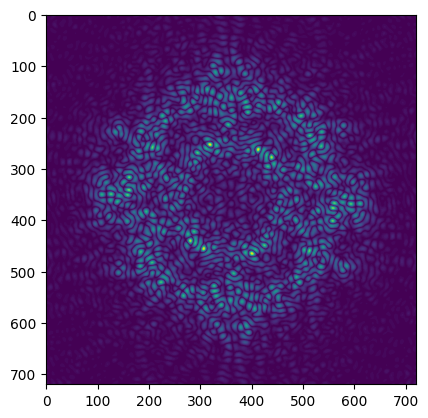

True

In [14]:
import numpy, math
import scipy.fftpack as fftim
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# opening the image and converting it to grayscale
a = Image.open('C:/Users/Kanni/Desktop/KCE-ECE-CVP-2023/Demo/Figures_FT/fft1.png').convert('L')
# a is converted to an ndarray
b = numpy.asarray(a)
# performing FFT
c = fftim.fft2(b)
# shifting the Fourier frequency image
d = fftim.fftshift(c)

# intializing variables for convolution function
M = d.shape[0]
N = d.shape[1]
# H is defined and
# values in H are initialized to 1
H = numpy.zeros((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # minimum cut-off radius
d_1 = 50.0 # maximum cut-off radius

# defining the convolution function for bandpass
for i in range(1, M):
    for j in range(1, N):
        r1 = (i-center1)**2+(j-center2)**2
        # euclidean distance from
        # origin is computed
        r = math.sqrt(r1)
        # using min and max cut-off to
        # create the band or annulus
        if r > d_0 and r < d_1:
            H[i,j] = 1.0

# performing the convolution
con = d * H
# computing the magnitude of the inverse FFT
e = abs(fftim.ifft2(con))
# e is converted from an ndarray to an image
f = e.astype(numpy.int8)
plt.imshow(f)
plt.show()
# saving the image as bandpass_output.png in
# Figures folder
cv2.imwrite('C:/Users/Kanni/Desktop/KCE-ECE-CVP-2023/Demo/Figures_FT/bandpass_output.png', f)


In [15]:
import scipy.misc
import numpy, math
import scipy.fftpack as fftim
from PIL import Image
import cv2

# Opening the image and converting it to grayscale.
b = Image.open('C:/Users/Kanni/Desktop/KCE-ECE-CVP-2023/Demo/Figures_FT/fft1.png').convert('L')
# Performing FFT.
c = fftim.fft2(b)
# Shifting the Fourier frequency image .
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and
# values in H are initialized to 1.
H = numpy.zeros((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # minimum cut-off radius
d_1 = 50.0 # maximum cut-off radius

# Defining the convolution function for bandpass
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = math.sqrt(r1)
        # Using min and max cut-off to create
		# the band or annulus.
        if r > d_0 and r < d_1:
            H[i,j] = 1.0

# Converting H to an image.
H = Image.fromarray(H)
# Performing the convolution.
con = d * H
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con))
# Saving the image as ibandpass_output.png.
cv2.imwrite('C:/Users/Kanni/Desktop/KCE-ECE-CVP-2023/Demo/Figures_FT/ibandpass_output.png', e)


True